# Modeling

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble  import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
feature_data_folder = './feature_data/'

In [427]:
#load all features & labels
#hog features
train_hog = np.load(feature_data_folder + 'hog+/train_hog.npy')
test_hog = np.load(feature_data_folder + 'hog+/test_hog.npy')
val_hog = np.load(feature_data_folder + 'hog+/val_hog.npy')

#resnet feature maps
train_resnet = np.load(feature_data_folder + 'resnet50/train-fmaps.npy')
test_resnet = np.load(feature_data_folder + 'resnet50/test-fmaps.npy')
val_resnet = np.load(feature_data_folder + 'resnet50/val-fmaps.npy')

#glcm
train_glcm = np.load(feature_data_folder + 'glcm/train_glcm.npy')
val_glcm = np.load(feature_data_folder + 'glcm/val_glcm.npy')
test_glcm = np.load(feature_data_folder + 'glcm/test_glcm.npy')

#glcm
train_bow = np.load(feature_data_folder + 'sift/train_bow.npy')
val_bow = np.load(feature_data_folder + 'sift/val_bow.npy')
test_bow = np.load(feature_data_folder + 'sift/test_bow.npy')

#load labels
train_labels = np.load(feature_data_folder + 'resnet50/train-labels.npy')
test_labels = np.load(feature_data_folder + 'resnet50/test-labels.npy')
val_labels = np.load(feature_data_folder + 'resnet50/val-labels.npy')

In [5]:
val_labels.shape, test_labels.shape

((2821,), (403,))

## Hog PCA

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_hog)

In [7]:
pca = PCA()
pca.fit(X_scaled)

PCA()

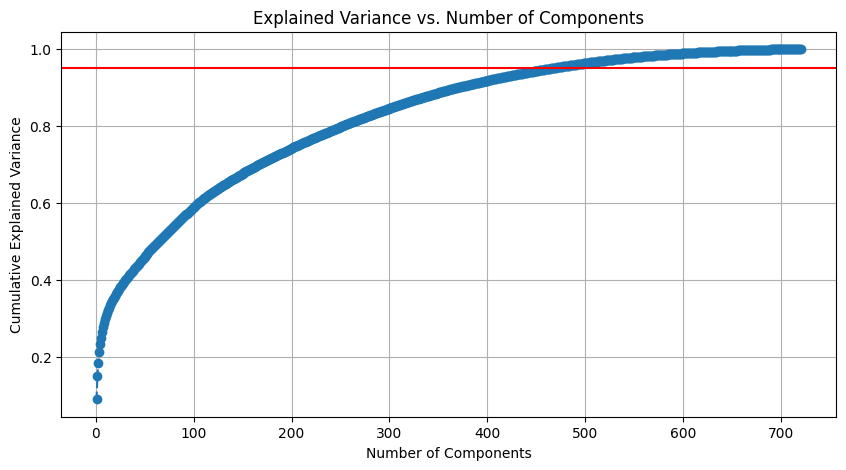

In [8]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## GLCM PCA

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_glcm)

In [10]:
pca = PCA()
pca.fit(X_scaled)

PCA()

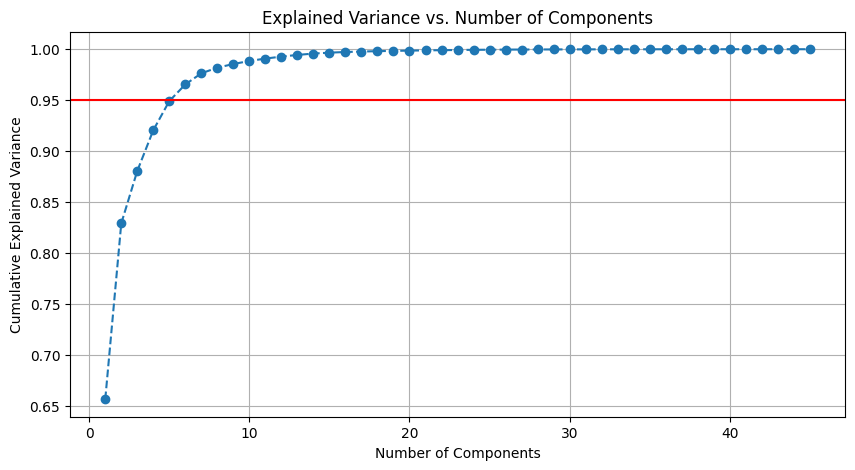

In [11]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## Resnet PCA

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_resnet)

In [13]:
pca = PCA()
pca.fit(X_scaled)

PCA()

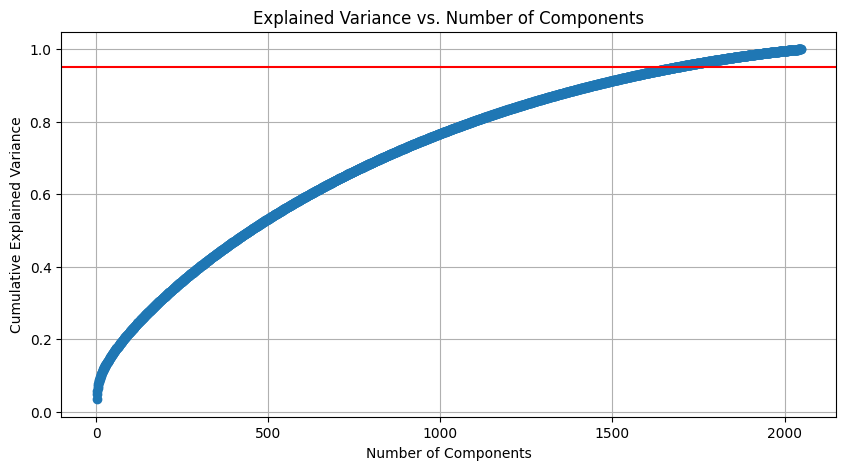

In [14]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## BoW PCA

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_bow)

In [16]:
pca = PCA()
pca.fit(X_scaled)

PCA()

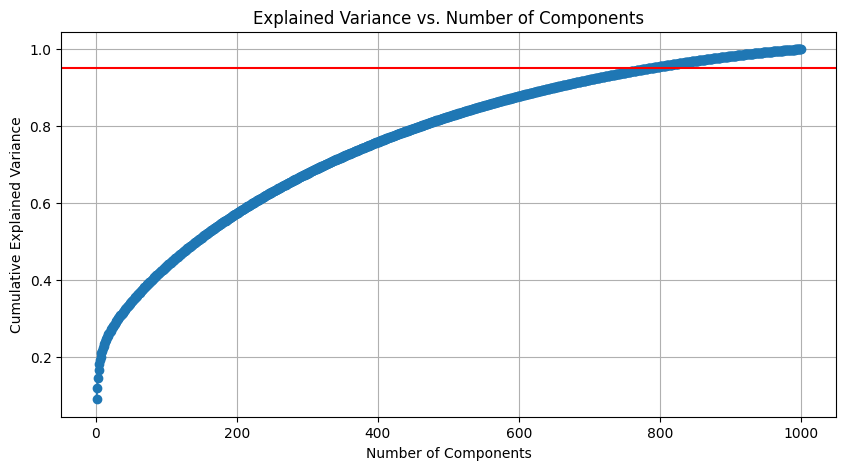

In [17]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## Data Prep

In [431]:
resnet_scaler = StandardScaler()
hog_scaler = StandardScaler()
glcm_scaler = StandardScaler()
bow_scaler = StandardScaler()

In [432]:
train_resnet_scaled = resnet_scaler.fit_transform(train_resnet)
train_hog_scaled = hog_scaler.fit_transform(train_hog)
train_glcm_scaled = glcm_scaler.fit_transform(train_glcm)
train_bow_scaled = bow_scaler.fit_transform(train_bow)

In [433]:
val_resnet_scaled = resnet_scaler.transform(val_resnet)
val_hog_scaled = hog_scaler.transform(val_hog)
val_glcm_scaled = glcm_scaler.transform(val_glcm)
val_bow_scaled = bow_scaler.transform(val_bow)

In [434]:
test_resnet_scaled = resnet_scaler.transform(test_resnet)
test_hog_scaled = hog_scaler.transform(test_hog)
test_glcm_scaled = glcm_scaler.transform(test_glcm)
test_bow_scaled = bow_scaler.transform(test_bow)

## Individual Baseline Classification

In [435]:
y_train = train_labels
y_val = val_labels

In [436]:
X_train = train_hog_scaled
X_val = val_hog_scaled

clf_logistic = LogisticRegression(max_iter=100, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

0.7192567167712155
0.40588443814250263


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [437]:
X_train = train_glcm_scaled
X_val = val_glcm_scaled

clf_logistic = LogisticRegression(max_iter=100, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

0.5681145697715706
0.46153846153846156


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [438]:
X_train = train_resnet_scaled
X_val = val_resnet_scaled

clf_logistic = LogisticRegression(max_iter=100, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

1.0
0.7851825593761078


In [439]:
X_train = train_bow_scaled
X_val = val_bow_scaled

clf_logistic = LogisticRegression(max_iter=100, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

0.990768138241212
0.6752924494859979


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Simple Classification

In [440]:
X_train = np.hstack([train_hog_scaled, train_glcm_scaled])
X_val = np.hstack([val_hog_scaled, val_glcm_scaled])

y_train = train_labels
y_val = val_labels

In [441]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

0.8444786365250325
0.5193193902871323


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [442]:
clf_sgd = SGDClassifier(max_iter=40, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.7944135400639128
0.5834810350939383


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [443]:
clf_svm_lin = svm.LinearSVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm_lin.score(X_train, y_train))
print(clf_svm_lin.score(X_val, y_val))

0.9012900935021896
0.5572492024104927


In [444]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9188069594034797
0.6100673520028359


In [445]:
clf_hist = HistGradientBoostingClassifier(class_weight='balanced').fit(X_train, y_train)
print(clf_hist.score(X_train, y_train))
print(clf_hist.score(X_val, y_val))

1.0
0.6699751861042184


## Complex Classification

In [446]:
X_train = np.hstack([train_resnet_scaled, train_bow_scaled])
X_val = np.hstack([val_resnet_scaled, val_bow_scaled])

y_train = train_labels
y_val = val_labels

In [447]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

1.0
0.815668202764977


In [448]:
clf_sgd = SGDClassifier(max_iter=40, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.9992898567877856
0.7851825593761078


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [449]:
clf_svm_lin = svm.LinearSVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm_lin.score(X_train, y_train))
print(clf_svm_lin.score(X_val, y_val))

1.0
0.7841191066997518


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [450]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9942004971002486
0.8110599078341014


In [451]:
clf_hist = HistGradientBoostingClassifier(class_weight='balanced').fit(X_train, y_train)
print(clf_hist.score(X_train, y_train))
print(clf_hist.score(X_val, y_val))

1.0
0.7961715703651188


## All Feature

In [741]:
X_train = np.hstack([train_hog_scaled, train_glcm_scaled, train_resnet_scaled, train_bow_scaled])
X_val = np.hstack([val_hog_scaled, val_glcm_scaled, val_resnet_scaled, val_bow_scaled])

y_train = train_labels
y_val = val_labels

In [453]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

1.0
0.8185040765685927


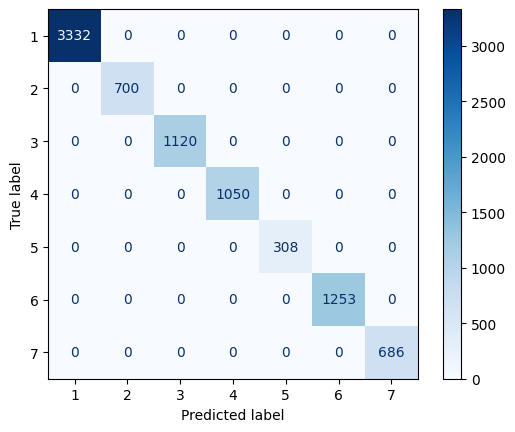

In [454]:
cm = confusion_matrix(y_train, clf_logistic.predict(X_train), labels = clf_logistic.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_logistic.classes_)
disp.plot(cmap='Blues')
plt.show()

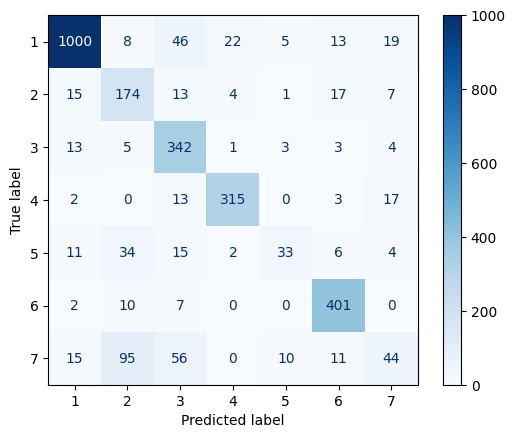

In [455]:
cm = confusion_matrix(y_val, clf_logistic.predict(X_val), labels = clf_logistic.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

In [456]:
clf_sgd = SGDClassifier(max_iter=40, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.9992898567877856
0.7855370436015597


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [457]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9965676411409634
0.8078695498050337


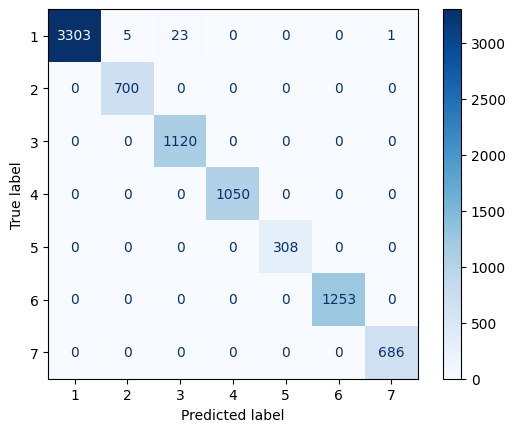

In [458]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

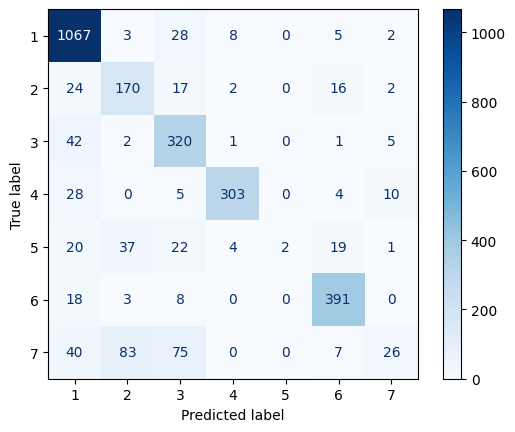

In [459]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

## Compression

Perform on BoW

Get Baseline

In [460]:
X_train = train_bow_scaled
X_val = val_bow_scaled

y_train = train_labels
y_val = val_labels

In [461]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9262634631317316
0.6763559021623538


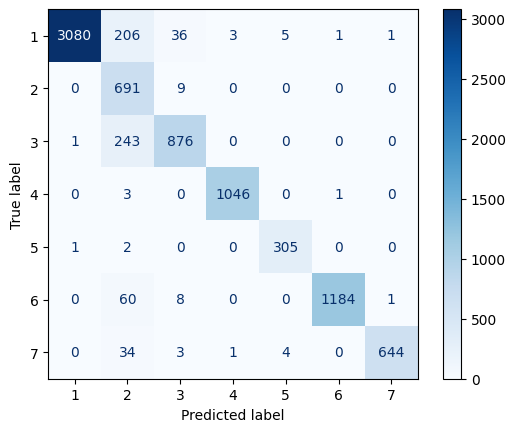

In [462]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

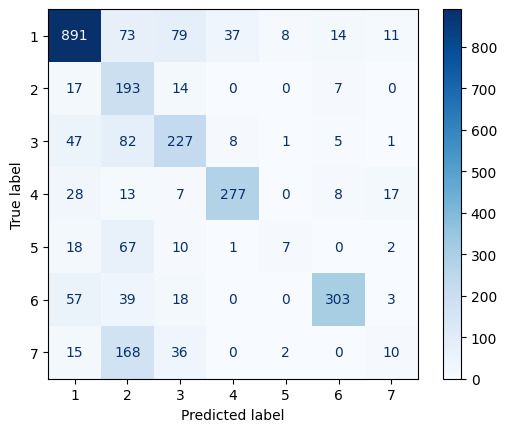

In [463]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform PCA

In [500]:
pca = PCA(35)
pca.fit(train_bow_scaled)

X_train = pca.transform(train_bow_scaled)
X_val = pca.transform(val_bow_scaled)

In [501]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.8669665049118239
0.6827366182204891


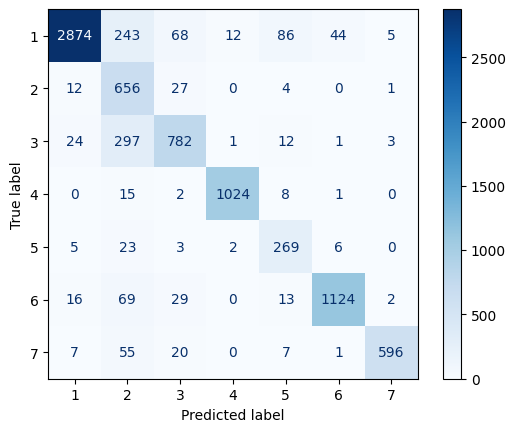

In [502]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Reducing the complexity increases validation by reducing overfit by giving a little more power to minor classes

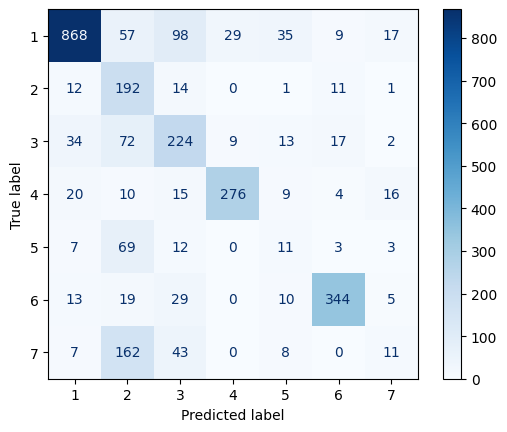

In [503]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform on ResNet 50

Get Baseline

In [484]:
X_train = train_resnet_scaled
X_val = val_resnet_scaled

y_train = train_labels
y_val = val_labels

In [485]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9895845662208546
0.8053881602268699


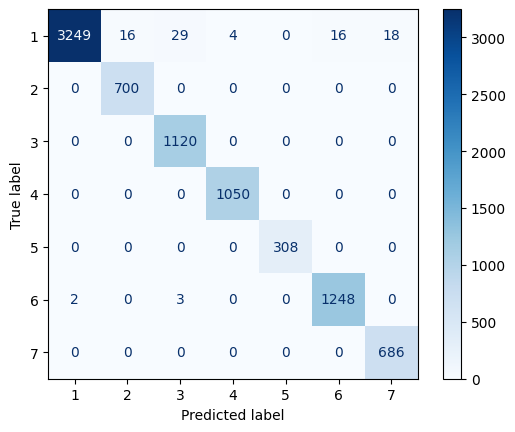

In [486]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

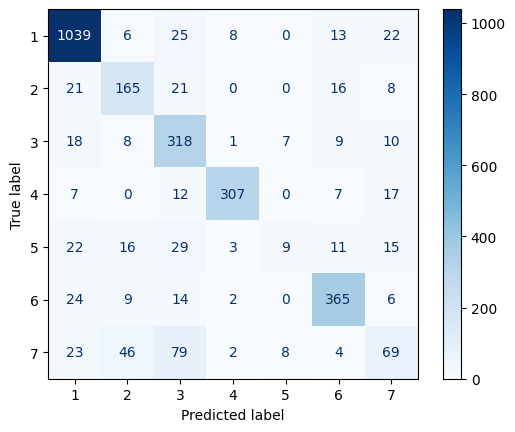

In [487]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform PCA

Get Baseline

In [504]:
X_train = train_resnet_scaled
X_val = val_resnet_scaled

y_train = train_labels
y_val = val_labels

In [510]:
pca = PCA(100)
pca.fit(train_resnet_scaled)

PCA(n_components=100)

In [511]:
X_train = pca.transform(train_resnet_scaled)
X_val = pca.transform(val_resnet_scaled)

In [512]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9719493431175287
0.8021978021978022


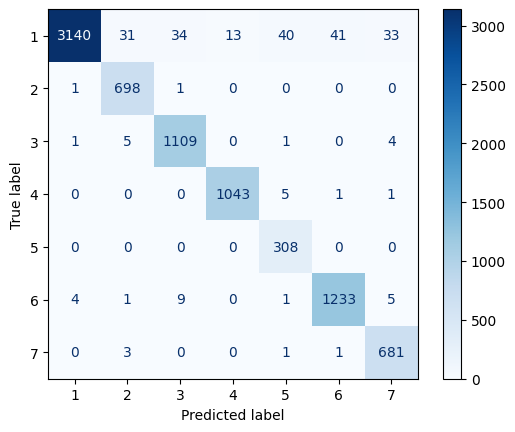

In [513]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

**PCA improved performance for minority classes**

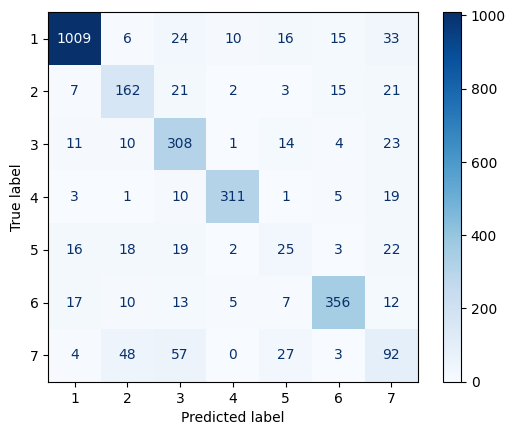

In [514]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform on HOG+

In [515]:
X_train = train_hog_scaled
X_val = val_hog_scaled

y_train = train_labels
y_val = val_labels

In [516]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.8861403716416144
0.5313718539524991


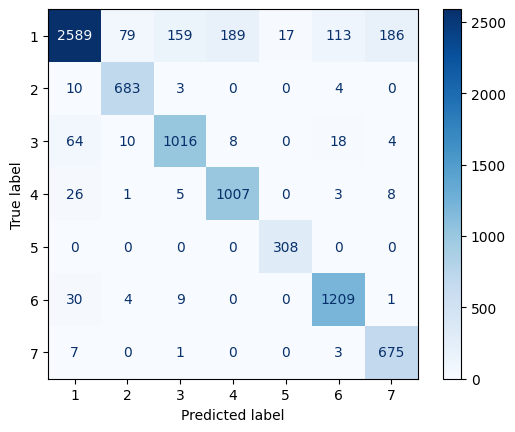

In [517]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

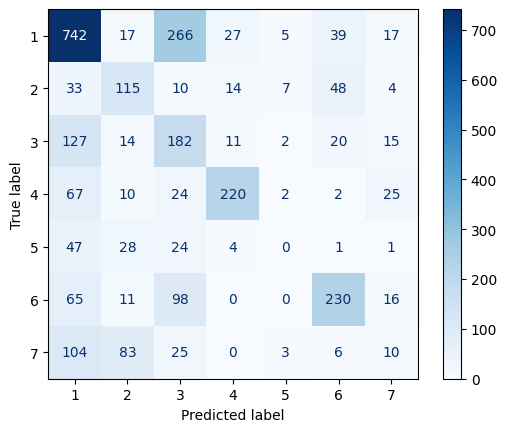

In [518]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform PCA

In [525]:
pca = PCA(80)
pca.fit(train_hog_scaled)

X_train = pca.transform(train_hog_scaled)
X_val = pca.transform(val_hog_scaled)

In [526]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.8205704817138123
0.5040765685926977


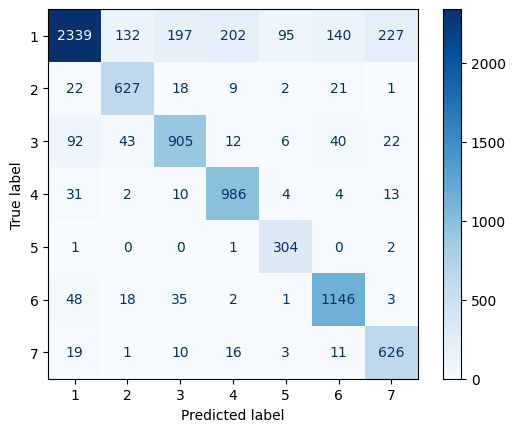

In [527]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Unlike other features decreasing the feature space here decreases both measures but we can at least benefit minority classes with compression

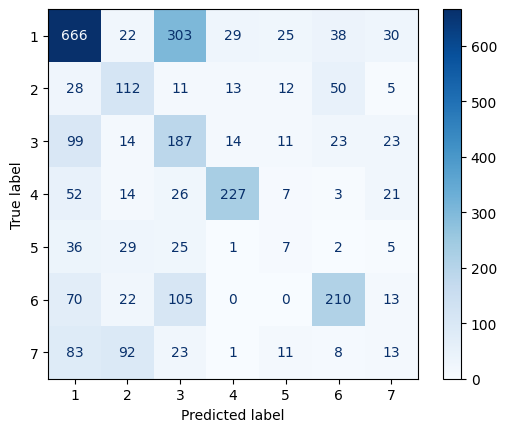

In [528]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform on GLCM

Get Baseline

In [529]:
X_train = train_glcm_scaled
X_val = val_glcm_scaled

y_train = train_labels
y_val = val_labels

In [530]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.7167712155284649
0.5292449485997873


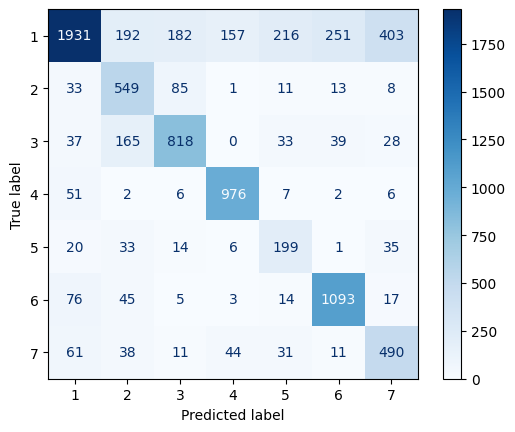

In [531]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

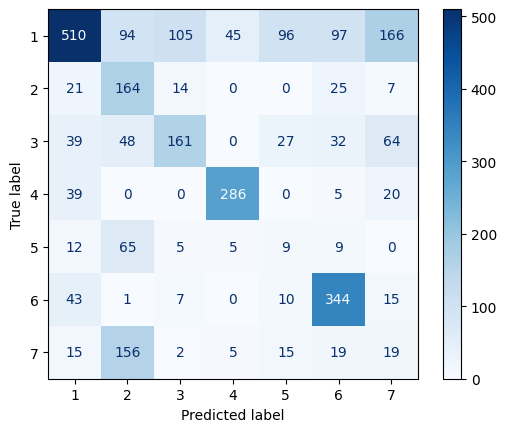

In [532]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform PCA

In [549]:
pca = PCA(15)
pca.fit(train_glcm_scaled)

X_train = pca.transform(train_glcm_scaled)
X_val = pca.transform(val_glcm_scaled)

In [550]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.7043437093147118
0.522155264090748


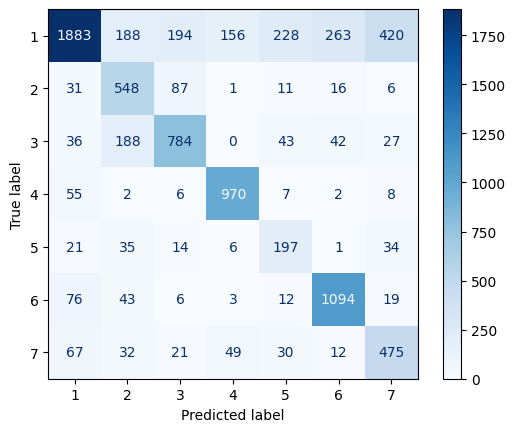

In [551]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

GLCM seems to decrease in both as PCA resumes and does not improve at all in the minority classes it might be worth discarding the feature as it will likely hurt the performance of the other features

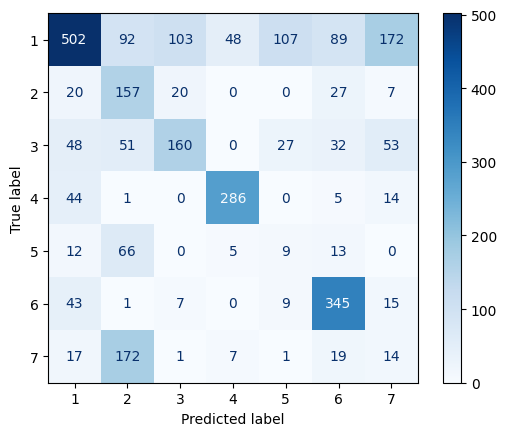

In [552]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

## Reduced Models

In [684]:
glcm_pca = PCA(15).fit(train_glcm_scaled)
hog_pca = PCA(5).fit(train_hog_scaled) # 5
resnet_pca = PCA(100).fit(train_resnet_scaled) # 50
bow_pca = PCA(30).fit(train_bow_scaled) # 30

In [774]:
glcm_orig = train_glcm_scaled.shape[1]
hog_orig = train_hog_scaled.shape[1]
resnet_orig = train_resnet_scaled.shape[1]
bow_orig = train_bow_scaled.shape[1]

print(f'GLCM reduction {(glcm_orig - 15) / glcm_orig:.2f}')
print(f'HOG reduction {(hog_orig - 5) / hog_orig:.2f}')
print(f'ResNet reduction {(resnet_orig - 100) / resnet_orig:.2f}')
print(f'BoW reduction {(bow_orig - 30) / bow_orig:.2f}')

GLCM reduction 0.67
HOG reduction 0.99
ResNet reduction 0.95
BoW reduction 0.97


In [555]:
X_train = np.hstack([
    hog_pca.transform(train_hog_scaled),
    glcm_pca.transform(train_glcm),
    resnet_pca.transform(train_resnet_scaled),
    bow_pca.transform(train_bow_scaled)
])

X_val = np.hstack([
    hog_pca.transform(val_hog_scaled),
    glcm_pca.transform(val_glcm),
    resnet_pca.transform(val_resnet_scaled),
    bow_pca.transform(val_bow_scaled)
])

y_train = train_labels
y_val = val_labels

In [556]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.664930761036809
0.5459057071960298


In [557]:
clf_hist = HistGradientBoostingClassifier(class_weight='balanced').fit(X_train, y_train)
print(clf_hist.score(X_train, y_train))
print(clf_hist.score(X_val, y_val))

1.0
0.7876639489542715


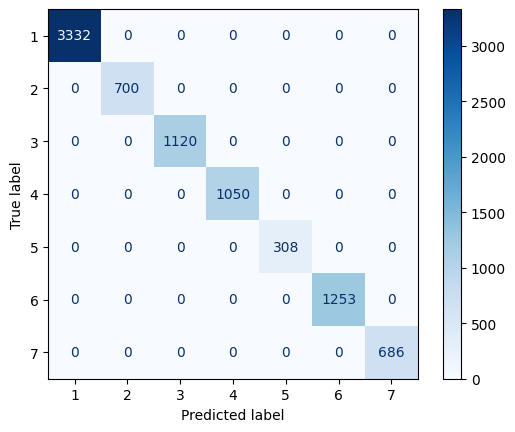

In [558]:
cm = confusion_matrix(y_train, clf_hist.predict(X_train), labels = clf_hist.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

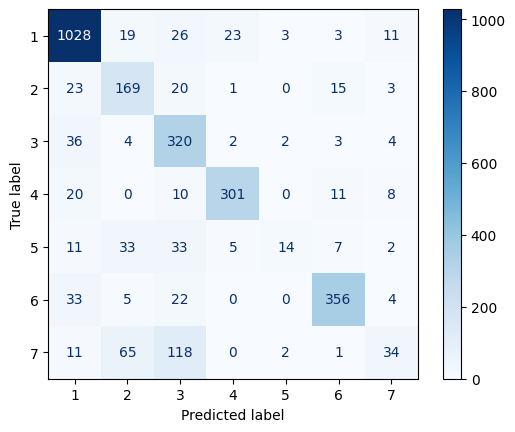

In [559]:
cm = confusion_matrix(y_val, clf_hist.predict(X_val), labels = clf_hist.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

In [756]:
X_train = np.hstack([
    hog_pca.transform(train_hog_scaled),
    resnet_pca.transform(train_resnet_scaled),
    bow_pca.transform(train_bow_scaled)
])

X_val = np.hstack([
    hog_pca.transform(val_hog_scaled),
    resnet_pca.transform(val_resnet_scaled),
    bow_pca.transform(val_bow_scaled)
])

X_test = np.hstack([
    hog_pca.transform(test_hog_scaled),
    resnet_pca.transform(test_resnet_scaled),
    bow_pca.transform(test_bow_scaled)
])

y_train = train_labels
y_val = val_labels
y_test = test_labels

In [575]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9867439933719967
0.8138957816377171


In [576]:
clf_logistic = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

0.95466919162031
0.8103509393831975


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


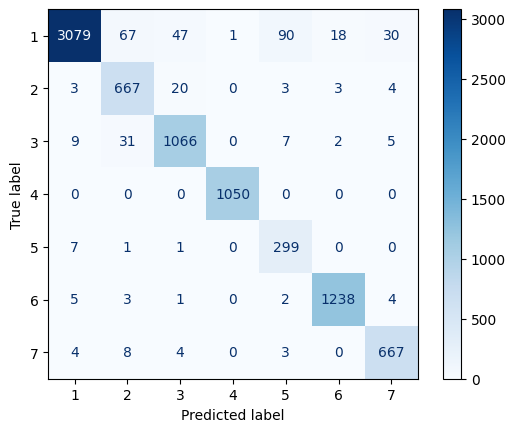

In [577]:
cm = confusion_matrix(y_train, clf_logistic.predict(X_train), labels = clf_logistic.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_logistic.classes_)
disp.plot(cmap='Blues')
plt.show()

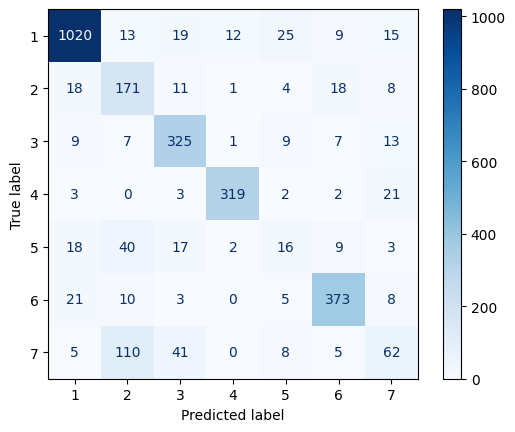

In [578]:
cm = confusion_matrix(y_val, clf_logistic.predict(X_val), labels = clf_logistic.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_logistic.classes_)
disp.plot(cmap='Blues')
plt.show()

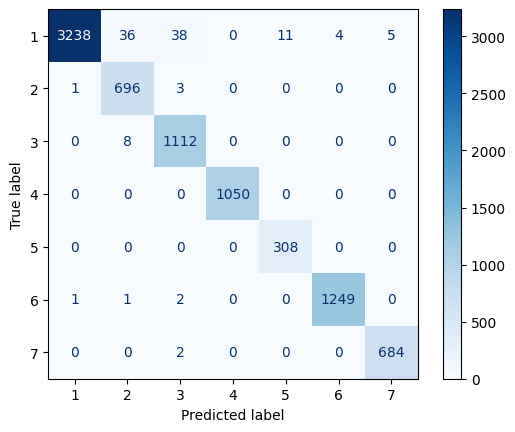

In [579]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

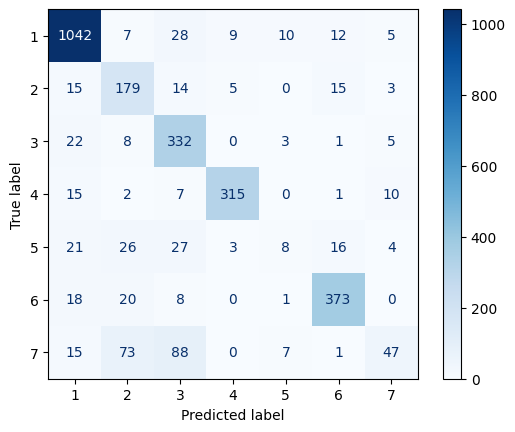

In [580]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

## Grid Search

In [581]:
X_combined = np.concatenate([X_train, X_val], axis=0)
y_combined = np.concatenate([y_train, y_val], axis=0)
test_fold = np.concatenate([-1 * np.ones(len(X_train), dtype=int), np.zeros(len(X_val), dtype=int)])

In [357]:
param_grid = {
  'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
  'penalty': ['l2', 'l1', 'elasticnet'],
  'max_iter': [50, 100, 200, 300],
  'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
}

ps = PredefinedSplit(test_fold)

# Create RandomizedSearchCV object
clf_sgd = RandomizedSearchCV(
    SGDClassifier(class_weight='balanced'),
    param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    n_jobs=2,
    cv=ps,
    random_state=42
).fit(X_combined, y_combined)

c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [358]:
clf_sgd.best_score_

0.8046791917759659

In [359]:
clf_sgd.best_estimator_

SGDClassifier(alpha=0.01, class_weight='balanced', loss='modified_huber',
              max_iter=100, penalty='l1')

In [582]:
# Define parameter grid for HistGradientBoostingClassifier
param_grid_hgb = {
  'learning_rate': [0.01, 0.05, 0.1, 0.2],
  'max_iter': [100, 200, 300, 400],
  'max_leaf_nodes': [15, 31, 63, 80],
  'max_depth': [None, 3, 5, 7],
  'min_samples_leaf': [20, 50, 100],
  'l2_regularization': [0, 0.1, 1, 10]
}

ps = PredefinedSplit(test_fold)

# Create RandomizedSearchCV object
clf_hgb = RandomizedSearchCV(
    HistGradientBoostingClassifier(class_weight='balanced'),
    param_distributions=param_grid_hgb,
    n_iter=50,  # Number of parameter settings that are sampled
    n_jobs=2,
    cv=ps,
    random_state=42
).fit(X_combined, y_combined)

In [583]:
clf_hgb.best_score_

0.8075150655795817

In [584]:
clf_hgb.best_estimator_

HistGradientBoostingClassifier(class_weight='balanced', l2_regularization=10,
                               learning_rate=0.2, max_depth=3, max_iter=400,
                               min_samples_leaf=100)

In [777]:
start_time = time.time()
clf_hgb.predict(X_train[:32])
end_time = time.time()
end_time - start_time

0.035076141357421875

In [686]:
clf_hgb = HistGradientBoostingClassifier(class_weight='balanced', min_samples_leaf=100, l2_regularization=10, learning_rate=0.2, max_depth=3, max_iter=400).fit(X_train, y_train)
print(clf_hgb.score(X_train, y_train))
print(clf_hgb.score(X_val, y_val))

1.0
0.8124778447359092


In [775]:
print(clf_hgb.score(X_test, y_test))

0.8560794044665012


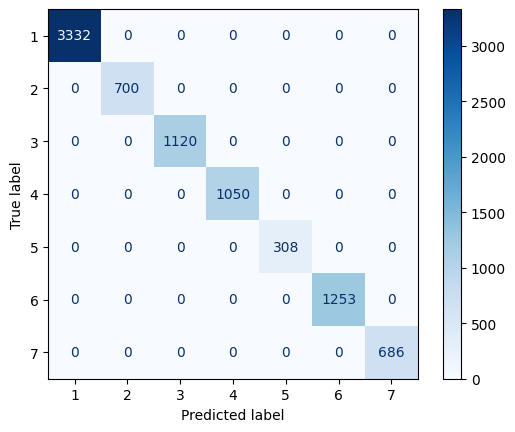

In [687]:
cm = confusion_matrix(y_train, clf_hgb.predict(X_train), labels = clf_hgb.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_hgb.classes_)
disp.plot(cmap='Blues')
plt.show()

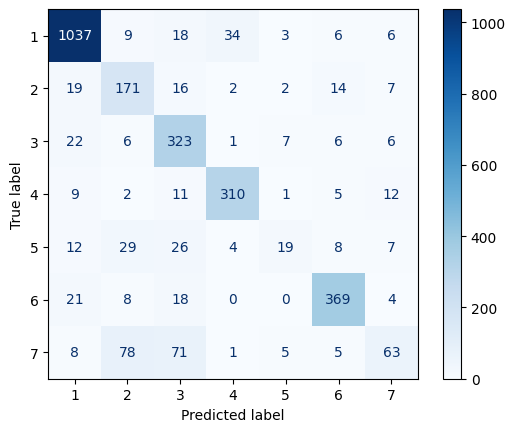

In [688]:
cm = confusion_matrix(y_val, clf_hgb.predict(X_val), labels = clf_hgb.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

In [710]:
# Define parameter grid for LogisticRegression
param_grid_lr = [{
  'penalty': ['l1', 'l2', None],
  'C': [0.01, 0.1, 1, 5, 10],
  'solver': ['liblinear'],
  'max_iter': [50, 100, 200, 250],
},
{
  'penalty': ['l2', None],
  'C': [0.01, 0.1, 1, 5, 10],
  'solver': ['sag', 'newton-cg', 'lbfgs'],
  'max_iter': [50, 100, 200, 250],
},
{
  'penalty': ['l1', 'l2', 'elasticnet'],
  'C': [0.01, 0.1, 1, 5, 10],
  'solver': ['saga'],
  'max_iter': [50, 100, 200, 250],
  'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # Only used if penalty is 'elasticnet'
}]

ps = PredefinedSplit(test_fold)

# Create RandomizedSearchCV object
clf_lr = RandomizedSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_distributions=param_grid_lr,
    n_iter=150,  # Number of parameter settings that are sampled
    n_jobs=2,
    cv=ps
).fit(X_combined, y_combined)

c:\Users\micha\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
8 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\micha\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\micha\miniconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver 

In [711]:
clf_lr.best_score_

0.8330379298121233

In [706]:
clf_lr.best_score_

0.8330379298121233

In [712]:
clf_lr.best_estimator_

LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [713]:
clf_lr = LogisticRegression(class_weight='balanced', C=1, penalty='l1', solver='liblinear').fit(X_train, y_train)
print(clf_lr.score(X_train, y_train))
print(clf_lr.score(X_val, y_val))
print(clf_lr.score(X_test, y_test))

0.9592851224997041
0.8333924140375754
0.858560794044665


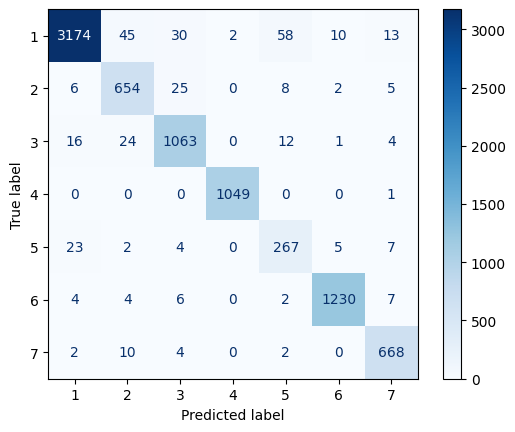

In [714]:
cm = confusion_matrix(y_train, clf_lr.predict(X_train), labels = clf_lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_lr.classes_)
disp.plot(cmap='Blues')
plt.show()

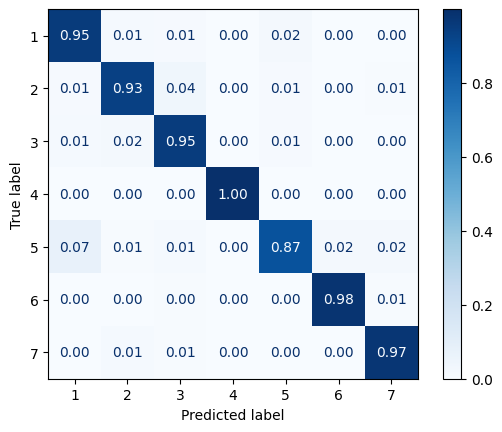

In [715]:
cm = confusion_matrix(y_train, clf_lr.predict(X_train), labels=clf_lr.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=clf_lr.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.show()

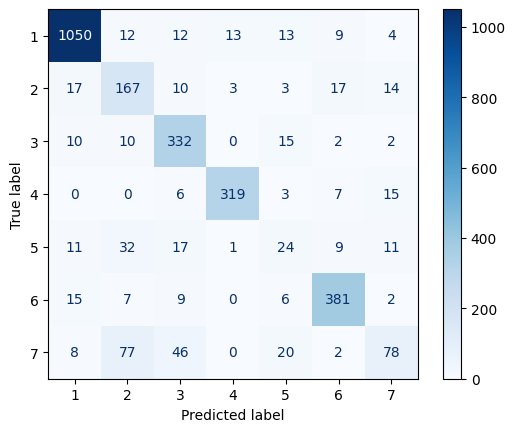

In [716]:
cm = confusion_matrix(y_val, clf_lr.predict(X_val), labels = clf_lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_lr.classes_)
disp.plot(cmap='Blues')
plt.show()

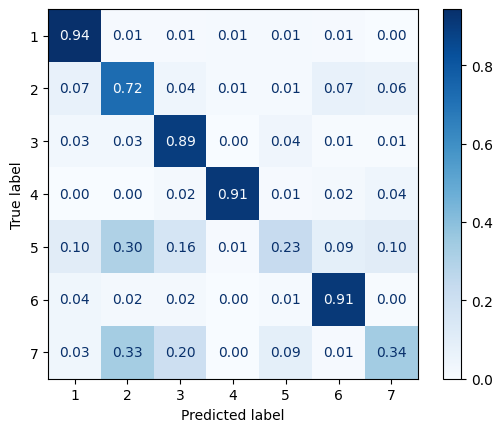

In [ ]:
cm = confusion_matrix(y_val, clf_lr.predict(X_val), labels=clf_lr.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=clf_lr.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.show()

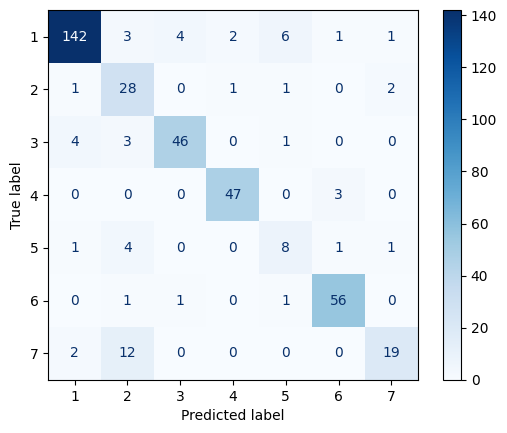

In [718]:
cm = confusion_matrix(y_test, clf_lr.predict(X_test), labels = clf_lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_lr.classes_)
disp.plot(cmap='Blues')
plt.show()

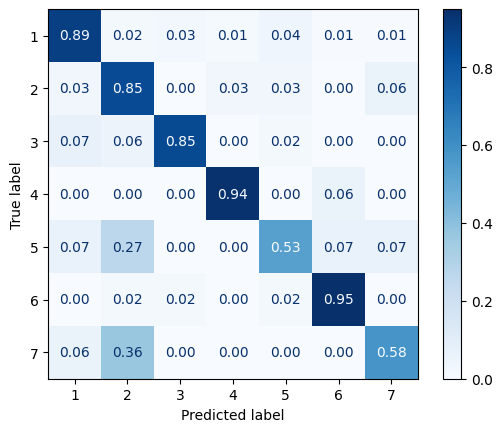

In [719]:
cm = confusion_matrix(y_test, clf_lr.predict(X_test), labels=clf_lr.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=clf_lr.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.show()

In [720]:
from sklearn.metrics import classification_report

print(classification_report(y_val, clf_lr.predict(X_val)))

              precision    recall  f1-score   support

           1       0.95      0.94      0.94      1113
           2       0.55      0.72      0.62       231
           3       0.77      0.89      0.83       371
           4       0.95      0.91      0.93       350
           5       0.29      0.23      0.25       105
           6       0.89      0.91      0.90       420
           7       0.62      0.34      0.44       231

    accuracy                           0.83      2821
   macro avg       0.72      0.71      0.70      2821
weighted avg       0.83      0.83      0.83      2821



In [721]:
param_grid = {
  'C': [4, 5, 6, 7.5, 10, 15, 18],
  'gamma': ['scale', 0.00007, 0.0001, 0.0002, 0.0003, 0.0002, 0.0005],
  'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

ps = PredefinedSplit(test_fold)

# Create RandomizedSearchCV object
clf_svm = RandomizedSearchCV(
    svm.SVC(class_weight='balanced'),
    param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    n_jobs=2,
    cv=ps
).fit(X_combined, y_combined)

In [722]:
clf_svm.best_score_

0.8248847926267281

In [723]:
clf_svm.best_estimator_

SVC(C=15, class_weight='balanced', gamma=0.0003)

In [724]:
clf_svm = svm.SVC(class_weight='balanced', C=15, gamma=3e-4).fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.993963782696177
0.8245303084012762


In [733]:
print(clf_svm.score(X_test, y_test))

0.8610421836228288


In [725]:
clf_svm_pb = svm.SVC(class_weight='balanced', C=15, gamma=3e-4, probability=True).fit(X_train, y_train)
print(clf_svm_pb.score(X_train, y_train))
print(clf_svm_pb.score(X_val, y_val))

0.993963782696177
0.8245303084012762


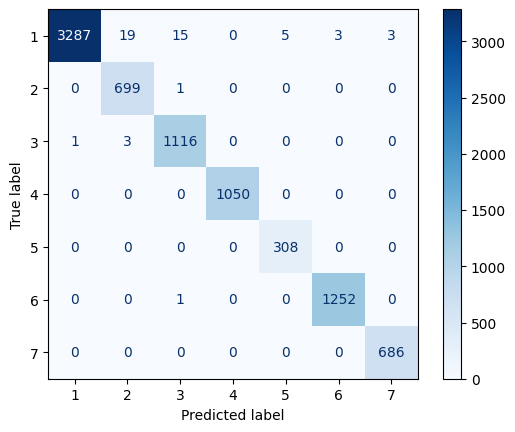

In [726]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

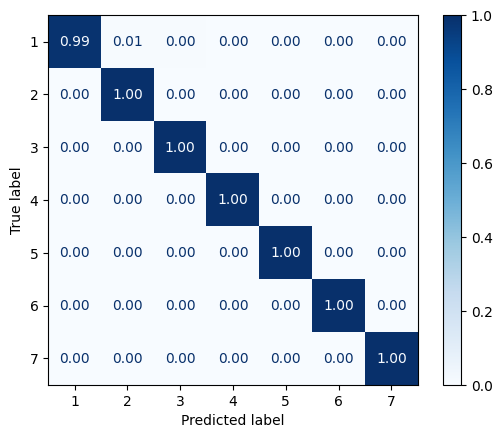

In [727]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=clf_svm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.show()

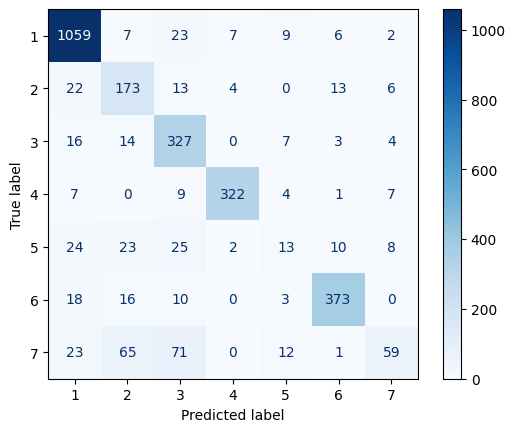

In [728]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

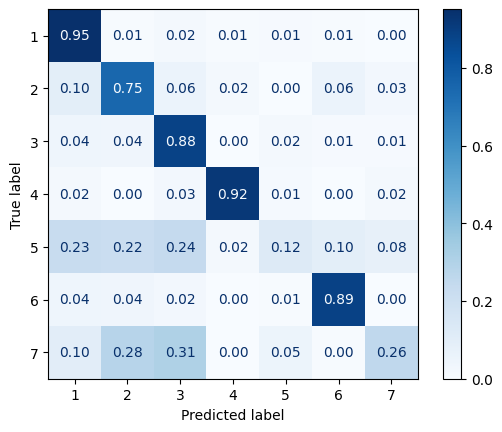

In [699]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=clf_svm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.show()

In [767]:
voting_clf = VotingClassifier(
    estimators=[('svm', clf_svm_pb), ('hg', clf_hgb), ('lr', clf_lr)],
    voting='soft' # Use 'hard' for majority voting or 'soft' for weighted probabilities
).fit(X_train, y_train)

In [768]:
start_time = time.time()
voting_clf.predict(X_train[:32])
end_time = time.time()
end_time - start_time

0.042606353759765625

In [769]:
print(voting_clf.score(X_train, y_train))
print(voting_clf.score(X_val, y_val))
print(voting_clf.score(X_test, y_test))

0.9971594271511421
0.8408365827720666
0.8709677419354839


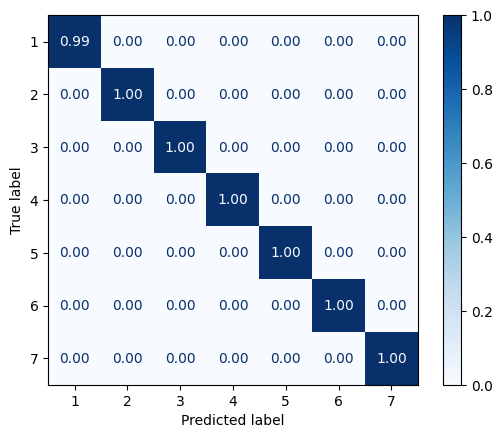

In [770]:
cm = confusion_matrix(y_train, voting_clf.predict(X_train), labels = voting_clf.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=voting_clf.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.show()

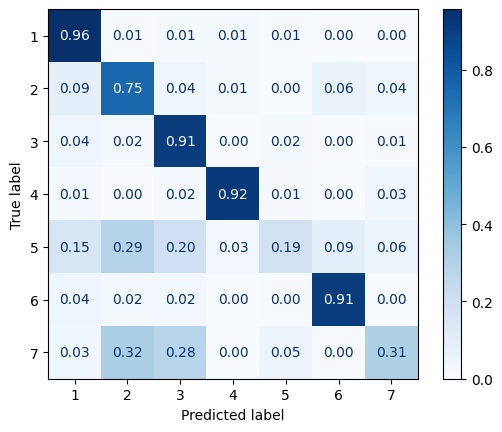

In [771]:
cm = confusion_matrix(y_val, voting_clf.predict(X_val), labels = voting_clf.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=voting_clf.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.show()

In [738]:
cm.diagonal() / cm.sum(axis=1)

array([0.89308176, 0.84848485, 0.81481481, 0.98      , 0.53333333,
       0.91525424, 0.6969697 ])

In [772]:
print(classification_report(y_test, voting_clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.94      0.90      0.92       159
           2       0.64      0.85      0.73        33
           3       0.87      0.83      0.85        54
           4       0.89      0.98      0.93        50
           5       0.47      0.47      0.47        15
           6       0.96      0.92      0.94        59
           7       0.86      0.76      0.81        33

    accuracy                           0.87       403
   macro avg       0.80      0.81      0.81       403
weighted avg       0.88      0.87      0.87       403



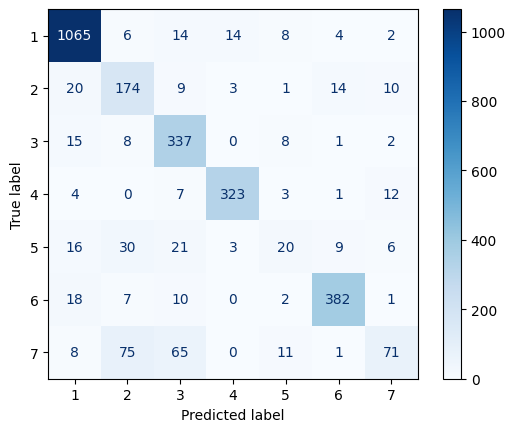

In [780]:
cm = confusion_matrix(y_val, voting_clf.predict(X_val), labels = voting_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap='Blues')
plt.show()

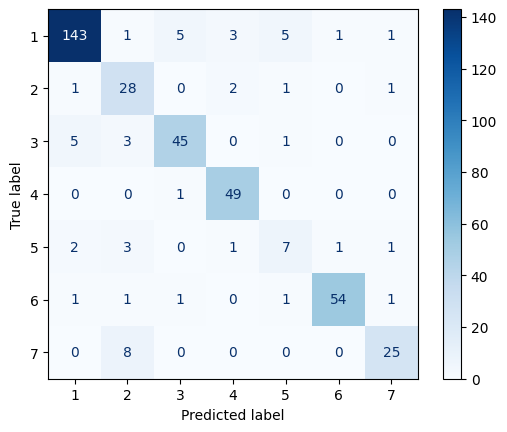

In [779]:
cm = confusion_matrix(y_test, voting_clf.predict(X_test), labels = voting_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap='Blues')
plt.show()

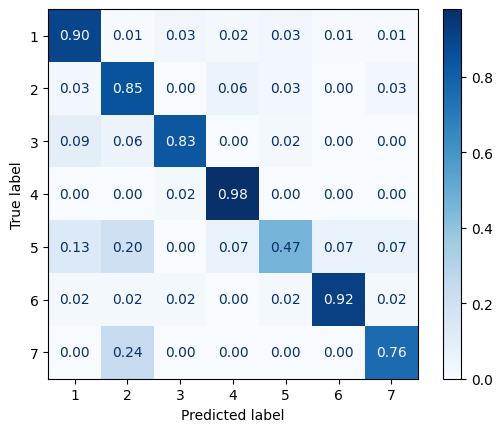

In [773]:
cm = confusion_matrix(y_test, voting_clf.predict(X_test), labels = voting_clf.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=voting_clf.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.show()